### Imports

In [410]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
import matplotlib.patheffects as path_effects
import matplotlib.pyplot as plt
import matplotlib.patheffects
import matplotlib.patheffects as pe


### Daten einlesen

In [411]:
games = pd.read_csv("D:/Python/Projektarbeit/Hauptordner/games2.csv")

In [412]:
champion1 = pd.read_csv("D:/Python/Projektarbeit/Hauptordner/champion1.0.csv")

In [413]:
champion2 = pd.read_csv("D:/Python/Projektarbeit/Hauptordner/champion2.0.csv")

In [414]:
spells = pd.read_csv("D:/Python/Projektarbeit/Hauptordner/Summoner_spell2.csv")

In [415]:
# Zielwert: Spieldauer in Minuten
y = games["gameDuration"] / 60  # in Minuten umrechnen

# Eingabematrix: alle numerischen Spalten außer dem Zielwert
X = games.select_dtypes(include="number").drop(columns=["gameDuration"])



### Visualisierung
- **Modellevaluation (Accuracy, Scores)**
**Wie gut das Modell insgesamt vorhersagen kann (Trefferquote).**

- **Confusion Matrix**
**Übersicht, wie oft Siege/Niederlagen richtig oder falsch vorhergesagt wurden.**

- **Vorhersagevergleiche (tatsächlich vs. Modell)**
**Gegenüberstellung: tatsächliches Ergebnis des Spiels vs. Modell-Vorhersage.**

- **Fehlerverteilung**
**Zeigt, wo das Modell sich am meisten irrt (z. B. Niederlage vorhergesagt, obwohl Team gewonnen hat).**

- **Feature-Wichtigkeit (Decision Tree / Logistic Regression)**
**Welche Faktoren (z. B. First Tower, First Dragon) haben den größten Einfluss auf die Siegwahrscheinlichkeit.**

- **Modellvergleich (Logistische Regression vs. Decision Tree)**
**Gegenüberstellung der beiden Modelle: Welches schneidet besser ab?**

- **Baseline vs. Modell (Mehrheitsklasse vs. Accuracy)**
**Vergleich: „Immer das häufigste Ergebnis raten“ vs. „Unser trainiertes Modell“.**

### Modellevaluation anzeigen

In [482]:
features = ['firstBlood', 'firstTower', 'firstDragon', 'firstBaron', 'firstInhibitor', 'firstRiftHerald']
X = games[features]
y = (games['winner'] == 1).astype(int)

In [483]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
acc_percent = round(acc * 100, 2)
print("Trefferquote (Modell):", acc_percent, "%")

Trefferquote (Modell): 82.35 %


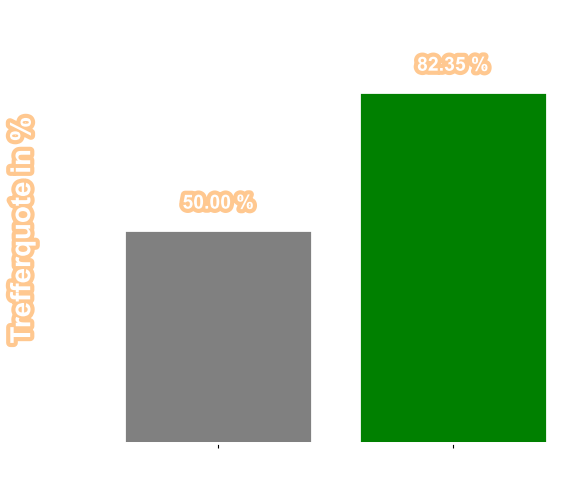

In [484]:
baseline_percent = 50
labels = ['Baseline', 'Modell']
werte = [baseline_percent, acc_percent]
farben = ['gray', 'green']

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 14

def glowing():
    return [pe.Stroke(linewidth=6, foreground="#FFA447", alpha=0.6), pe.Normal()]

fig, ax = plt.subplots(figsize=(6, 5))
bars = ax.bar(labels, werte, color=farben, edgecolor="white", linewidth=2)

ax.set_ylim(0, 100)

ylabel = ax.set_ylabel("Trefferquote in %", labelpad=18, fontsize=20,
                       fontweight="bold", color="white")
ylabel.set_path_effects(glowing())

offset = max(werte) * 0.05
for bar in bars:
    hoehe = bar.get_height()
    t = ax.text(bar.get_x() + bar.get_width()/2, hoehe + offset,
                f"{hoehe:.2f} %",
                ha="center", va="bottom",
                fontsize=14, fontweight="bold", color="white")
    t.set_path_effects(glowing())

ax.tick_params(axis="y", colors="white")
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels, color="white", fontsize=12, fontweight="bold")

for side in ['top', 'right']:
    ax.spines[side].set_visible(False)
for side in ['left', 'bottom']:
    ax.spines[side].set_color("white")
    ax.spines[side].set_linewidth(2)

ax.set_facecolor('none')
fig.patch.set_alpha(0.0)

plt.tight_layout()
plt.show()


# Die 82.35 lag die vorhersage richtig.Das Team 1 das spiel gewinnt.
# Die Fragenstellung war Gewinnt Team 1.

### Confusion Matrix

In [478]:
cm = confusion_matrix(y_test, y_pred)

In [479]:
print(y_test)

7704     1
50359    1
46875    0
42275    1
3535     1
        ..
16035    0
650      1
12506    0
15744    1
30145    0
Name: winner, Length: 10211, dtype: int64


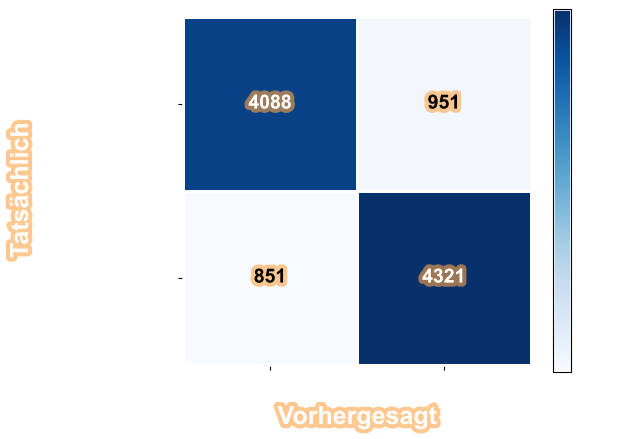

In [480]:
cm = np.array([[4088, 951],
               [851, 4321]])

labels = ["Team 2 gewinnt", "Team 1 gewinnt"]

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 14

def glowing(): return [pe.Stroke(linewidth=6, foreground="#FFA447", alpha=0.6), pe.Normal()]

fig, ax = plt.subplots(figsize=(6.5, 5.5))
im = ax.imshow(cm, cmap="Blues")

ax.set_xticks(np.arange(2))
ax.set_yticks(np.arange(2))
ax.set_xticklabels(labels, color="white", fontweight="bold", fontsize=12)
ax.set_yticklabels(labels, color="white", fontweight="bold", fontsize=12)

xlabel = ax.set_xlabel("Vorhergesagt", labelpad=12, fontsize=18, color='white', fontweight='bold')
ylabel = ax.set_ylabel("Tatsächlich", labelpad=12, fontsize=18, color='white', fontweight='bold')
xlabel.set_path_effects(glowing())
ylabel.set_path_effects(glowing())

for i in range(2):
    for j in range(2):
        val = cm[i, j]
        txt_color = "white" if i == j else "black"
        ax.add_patch(plt.Rectangle((j - 0.5, i - 0.5), 1, 1, fill=False, edgecolor="white", linewidth=2))
        t = ax.text(j, i, f"{val}", ha="center", va="center", fontsize=14, fontweight="bold", color=txt_color)
        t.set_path_effects(glowing())

for spine in ax.spines.values():
    spine.set_edgecolor("white")
    spine.set_linewidth(2)

cbar = fig.colorbar(im, ax=ax, shrink=0.8, pad=0.05)
cbar.ax.yaxis.set_tick_params(color="white")
plt.setp(cbar.ax.get_yticklabels(), color="white")
cbar.ax.add_patch(plt.Rectangle((0, 0), 1, 1, transform=cbar.ax.transAxes,
                                fill=False, edgecolor="white", linewidth=2))

ax.set_facecolor("none")
fig.patch.set_alpha(0.0)

plt.tight_layout()
plt.show()

# Blau da stimmte die Vorhersage und bei weiß Stimmte die Vorhersage mit den wins nicht.

### Vorhersagevergleiche

In [475]:
vergleich = pd.DataFrame({
    'Tatsächlich': y_test,
    'Vorhergesagt': y_pred
})
vergleich.head(10)

,Tatsächlich,Vorhergesagt
7704,1,1
50359,1,1
46875,0,0
42275,1,1
3535,1,1
47590,0,0
5201,1,0
34584,0,0
471,0,0
45946,0,0


In [476]:
vergleich['Richtig'] = vergleich['Tatsächlich'] == vergleich['Vorhergesagt']
ergebnis = vergleich['Richtig'].value_counts()
print(ergebnis)

Richtig
True     8409
False    1802
Name: count, dtype: int64


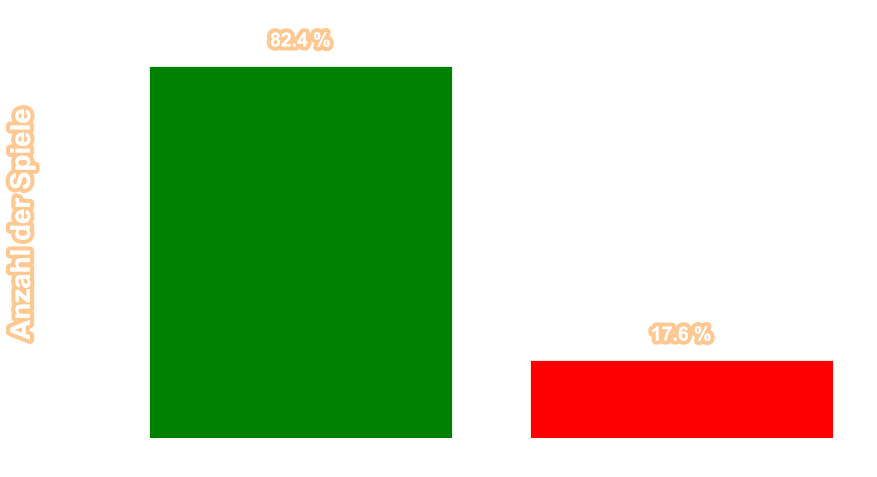

In [477]:
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 14

def glowing():
    return [path_effects.withStroke(linewidth=6, foreground='#FFA447', alpha=0.6), path_effects.Normal()]

labels = ['Richtig', 'Falsch']
werte = ergebnis.values
farben = ['green', 'red']

fig, ax = plt.subplots(figsize=(9, 5))
bars = ax.bar(labels, werte, color=farben, edgecolor='white', linewidth=2)

gesamt = sum(werte)
offset = max(werte) * 0.05

for i, wert in enumerate(werte):
    prozent = (wert / gesamt) * 100
    t = ax.text(i, wert + offset,
                f'{prozent:.1f} %',
                ha='center', fontsize=14, color='white', fontweight='bold')
    t.set_path_effects(glowing())

ylabel = ax.set_ylabel('Anzahl der Spiele', fontsize=20, color='white', fontweight='bold', labelpad=18)
ylabel.set_path_effects(glowing())

ax.set_ylim(0, max(werte) * 1.15)
ax.tick_params(colors='white')

for side in ['top', 'right']:
    ax.spines[side].set_visible(False)
for side in ['left', 'bottom']:
    ax.spines[side].set_color('white')
    ax.spines[side].set_linewidth(2)

ax.set_facecolor('none')
fig.patch.set_alpha(0.0)

plt.tight_layout()
plt.show()


# Hier wird die Vorhersage ob Team 1 oder 2 Gewinnen wird vorhergesagt und wie oft das Modull recht hatte und nicht recht hatte.

### Fehlerverteilung

In [471]:
vergleich = pd.DataFrame({
    'Tatsächlich': y_test,
    'Vorhergesagt': y_pred
})
vergleich['Richtig'] = vergleich['Tatsächlich'] == vergleich['Vorhergesagt']
fehler = vergleich[vergleich['Richtig'] == False]

In [472]:
fehler_verteilung = fehler['Tatsächlich'].value_counts().sort_index()
print(fehler_verteilung)

Tatsächlich
0    951
1    851
Name: count, dtype: int64


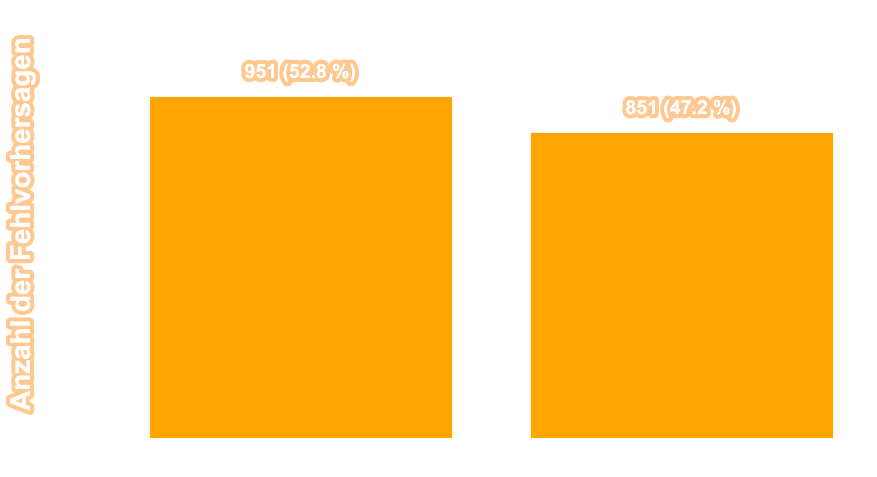

In [474]:
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 14

def glowing(): return [path_effects.withStroke(linewidth=6, foreground='#FFA447', alpha=0.6), path_effects.Normal()]

fig, ax = plt.subplots(figsize=(9, 5))

labels = ['Team 2 gewinnt', 'Team 1 gewinnt']
werte = fehler_verteilung.values
gesamt = werte.sum()

bars = ax.bar(labels, werte, color='orange', edgecolor='white', linewidth=2)

offset = max(werte) * 0.05

for i, wert in enumerate(werte):
    prozent = wert / gesamt * 100
    t = ax.text(i, wert + offset,
                f'{wert} ({prozent:.1f} %)',
                ha='center', fontsize=14, color='white', fontweight='bold')
    t.set_path_effects(glowing())

ylabel = ax.set_ylabel('Anzahl der Fehlvorhersagen', fontsize=20, color='white', fontweight='bold', labelpad=18)
ylabel.set_path_effects(glowing())

ax.set_ylim(0, max(werte) * 1.25)
ax.tick_params(colors='white')

for side in ['top', 'right']:
    ax.spines[side].set_visible(False)
for side in ['left', 'bottom']:
    ax.spines[side].set_color('white')
    ax.spines[side].set_linewidth(2)

ax.set_facecolor('none')
fig.patch.set_alpha(0.0)

plt.tight_layout()
plt.show()



# Hier sehen wir noch mal wie oft das Modull Falsch gelegen hat mit der Vorhersage.

### Feature-Wichtigkeit

In [468]:
features = ['firstBlood', 'firstTower', 'firstDragon', 'firstBaron', 'firstInhibitor', 'firstRiftHerald']
X = games[features]
y = (games['winner'] == 1).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [469]:
wichtigkeiten = pd.Series(model.coef_[0], index=features)
wichtigkeiten = wichtigkeiten.sort_values(key=abs, ascending=False)

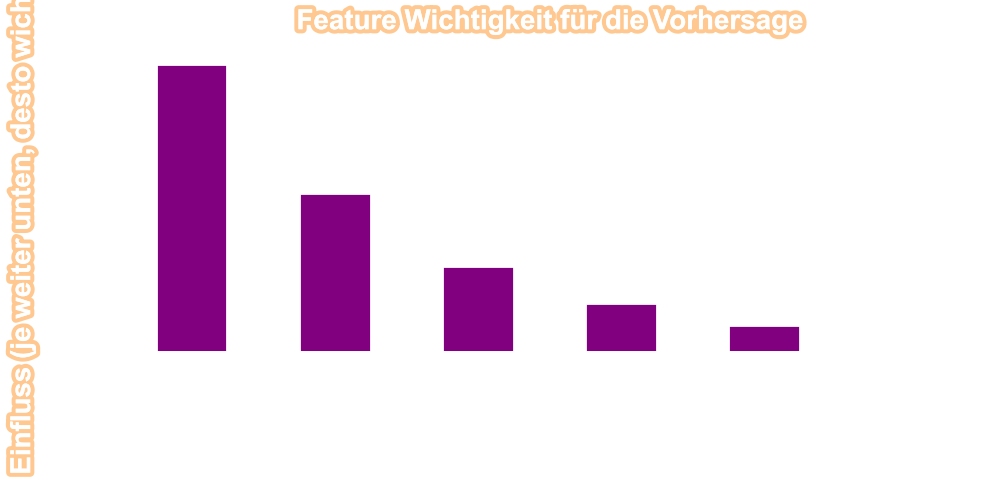

In [ ]:
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 14

def glowing(): return [path_effects.withStroke(linewidth=6, foreground='#FFA447', alpha=0.6), path_effects.Normal()]

fig, ax = plt.subplots(figsize=(10, 5))

wichtigkeiten.sort_values().plot(
    kind='bar',
    color='purple',
    edgecolor='white',
    linewidth=2,
    ax=ax
)

ylabel = ax.set_ylabel('Einfluss (je weiter unten, desto wichtiger)', fontsize=20, color='white', fontweight='bold', labelpad=18)
ylabel.set_path_effects(glowing())

ax.tick_params(colors='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', color='white', fontweight='bold')

for side in ['top', 'right']:
    ax.spines[side].set_visible(False)
for side in ['left', 'bottom']:
    ax.spines[side].set_color('white')
    ax.spines[side].set_linewidth(2)

ax.set_facecolor('none')
fig.patch.set_alpha(0.0)

ax.invert_yaxis()

plt.tight_layout()
plt.show()


# Das Modell hat erkannt Wenn Team 1 den First Tower oder First Inhibitor holt, steigt die Wahrscheinlichkeit, dass Team 1 gewinnt
# Auch wenn die Werte negativ sind, zeigt ihre Größe, wie stark dieses Ereignis mit einem Sieg von Team 1 zusammenhängt

### Modellvergleich

In [464]:
features = ['firstBlood', 'firstTower', 'firstDragon', 'firstBaron', 'firstInhibitor', 'firstRiftHerald']
X = games[features]
y = (games['winner'] == 1).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [465]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
acc_log = accuracy_score(y_test, y_pred_log)

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
acc_tree = accuracy_score(y_test, y_pred_tree)

C:\Users\aljos\AppData\Local\Temp\ipykernel_1136\2094075326.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(modelle, color='white', fontweight='bold')


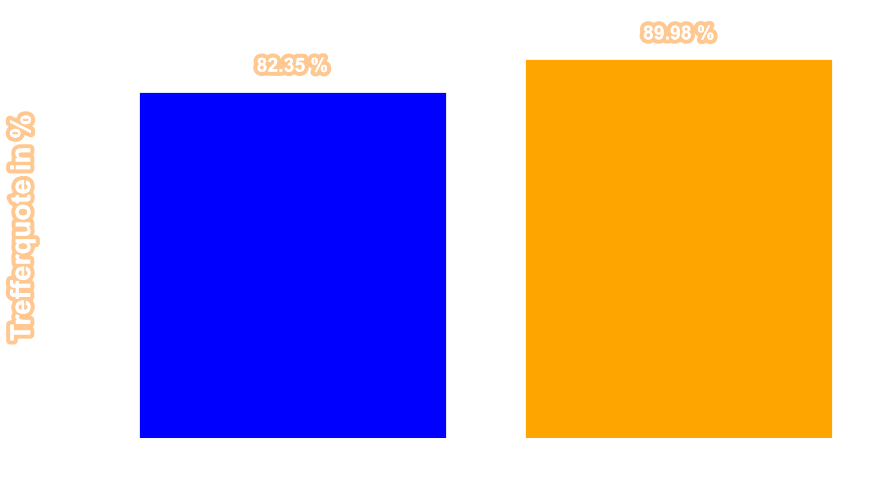

In [467]:
modelle = ['Logistische Regression', 'Entscheidungsbaum']
genauigkeit = [acc_log * 100, acc_tree * 100]
farben = ['blue', 'orange']

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 14

def glowing(): return [path_effects.withStroke(linewidth=6, foreground='#FFA447', alpha=0.6), path_effects.Normal()]

fig, ax = plt.subplots(figsize=(9, 5))
bars = ax.bar(modelle, genauigkeit, color=farben, edgecolor='white', linewidth=2)

for i, bar in enumerate(bars):
    yval = bar.get_height()
    text = ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.05 * max(genauigkeit),
                   f'{yval:.2f} %', ha='center', color='white',
                   fontweight='bold', fontsize=14)
    text.set_path_effects(glowing())

ylabel = ax.set_ylabel('Trefferquote in %', fontsize=20, color='white', fontweight='bold', labelpad=18)
ylabel.set_path_effects(glowing())

ax.set_ylim(0, 100)
ax.tick_params(colors='white')
ax.set_xticklabels(modelle, color='white', fontweight='bold')

for side in ['top', 'right']:
    ax.spines[side].set_visible(False)
for side in ['left', 'bottom']:
    ax.spines[side].set_color('white')
    ax.spines[side].set_linewidth(2)

ax.set_facecolor('none')
fig.patch.set_alpha(0.0)

plt.tight_layout()
plt.show()

# Hier vergleichen wir, ob die logistische Regression oder der Entscheidungsbaum bessere Ergebnisse liefert

### Baseline vs. Modell

In [459]:
y = (games['winner'] == 1).astype(int)
baseline_wert = y.value_counts().max() / len(y)
baseline_prozent = baseline_wert * 100

In [460]:
features = ['firstBlood', 'firstTower', 'firstDragon', 'firstBaron', 'firstInhibitor', 'firstRiftHerald']
X = games[features]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
model_acc = accuracy_score(y_test, y_pred) * 100

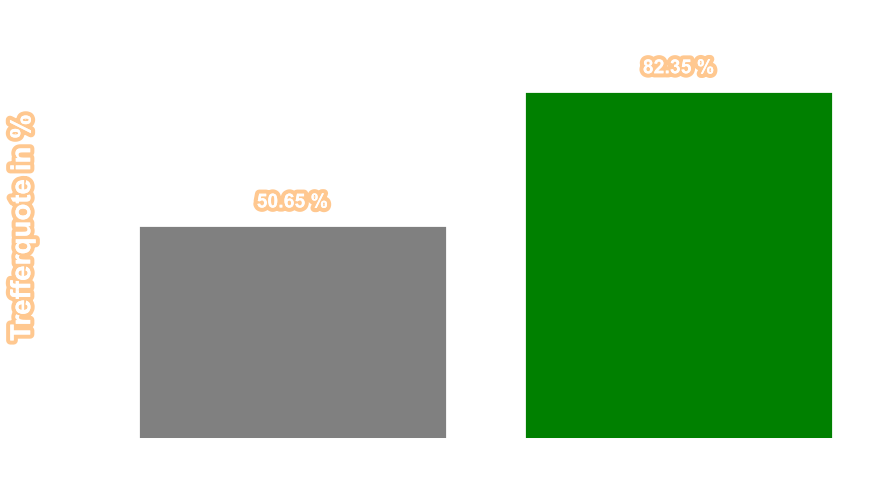

In [462]:
werte = [baseline_prozent, model_acc]
labels = ['Baseline (Mehrheit raten)', 'Modell']
farben = ['gray', 'green']

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 14

def glowing(): return [path_effects.withStroke(linewidth=6, foreground='#FFA447', alpha=0.6), path_effects.Normal()]

fig, ax = plt.subplots(figsize=(9, 5))
bars = ax.bar(labels, werte, color=farben, edgecolor='white', linewidth=2)

for i, bar in enumerate(bars):
    yval = bar.get_height()
    text = ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.05 * max(werte),
                   f'{yval:.2f} %', ha='center', color='white',
                   fontweight='bold', fontsize=14)
    text.set_path_effects(glowing())

ylabel = ax.set_ylabel('Trefferquote in %', fontsize=20, color='white', fontweight='bold', labelpad=18)
ylabel.set_path_effects(glowing())

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('white'); ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_color('white'); ax.spines['bottom'].set_linewidth(2)
ax.tick_params(colors='white')

ax.set_ylim(0, 100)
ax.set_facecolor('none')
fig.patch.set_alpha(0.0)

plt.tight_layout()
plt.show()



# Die Baseline rät nur, das Modell erkennt Muster und trifft dadurch bessere Entscheidungen.

### Modellbewertung 

In [437]:
RANDOM_STATE = 42

modelle = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}
cv_scores = {
    name: {"R2": [], "MSE": [], "RMSE": [], "MAE": []}
    for name in modelle
}

for i in range(5):
    X_tr, X_te, y_tr, y_te = train_test_split(
        X, y, test_size=0.2, shuffle=True, random_state=RANDOM_STATE + i
    )
    for name, modell in modelle.items():
        modell.fit(X_tr, y_tr)
        y_hat = modell.predict(X_te)
        mse = mean_squared_error(y_te, y_hat)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_te, y_hat)
        r2 = r2_score(y_te, y_hat)

        cv_scores[name]["MSE"].append(mse)
        cv_scores[name]["RMSE"].append(rmse)
        cv_scores[name]["MAE"].append(mae)
        cv_scores[name]["R2"].append(r2)

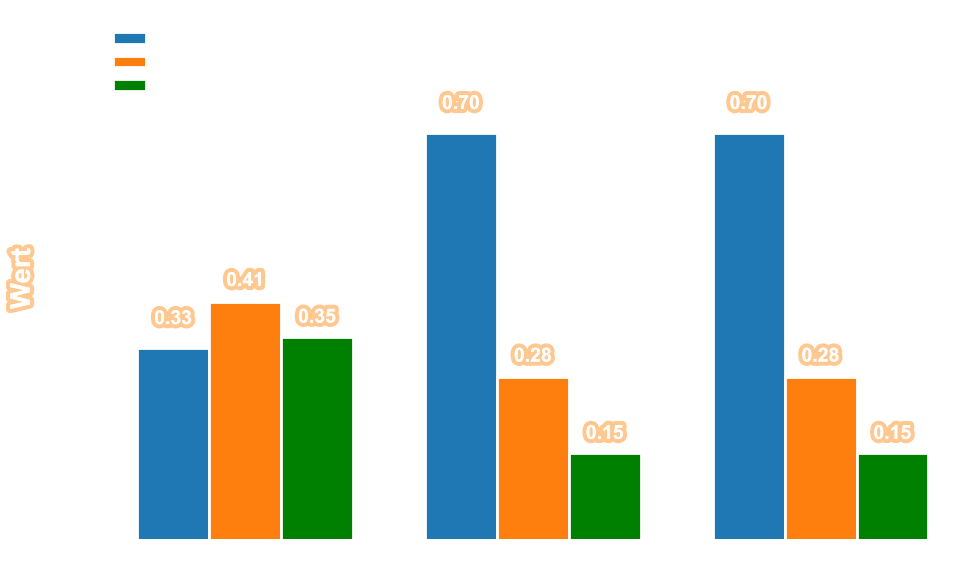

In [458]:
modelle = ['Linear Regression', 'Decision Tree', 'Random Forest']
metriken = ['R2', 'RMSE', 'MAE']

werte = {
    'R2':   [0.33, 0.70, 0.70],
    'RMSE': [0.41, 0.28, 0.28],
    'MAE':  [0.35, 0.15, 0.15]
}

farben = ['#1f77b4', '#ff7f0e', 'green']

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 14

def glowing():
    return [path_effects.withStroke(linewidth=6, foreground='#FFA447', alpha=0.6), path_effects.Normal()]

x = np.arange(len(modelle))
breite = 0.25

fig, ax = plt.subplots(figsize=(10, 6))

for i, metrik in enumerate(metriken):
    bars = ax.bar(x + i * breite, werte[metrik], width=breite,
                  label=metrik, color=farben[i], edgecolor='white', linewidth=2)

    for bar in bars:
        y = bar.get_height()
        t = ax.text(bar.get_x() + bar.get_width()/2, y + 0.05 * max(werte[metrik]),
                    f'{y:.2f}', ha='center', va='bottom', color='white',
                    fontweight='bold', fontsize=14)
        t.set_path_effects(glowing())

ylabel = ax.set_ylabel('Wert', fontsize=20, color='white', fontweight='bold', labelpad=18)
ylabel.set_path_effects(glowing())

ax.set_xticks(x + breite)
ax.set_xticklabels(modelle, color='white', fontweight='bold')

ax.tick_params(colors='white')
for side in ['top', 'right']:
    ax.spines[side].set_visible(False)
for side in ['left', 'bottom']:
    ax.spines[side].set_color('white')
    ax.spines[side].set_linewidth(2)

leg = ax.legend(frameon=False, loc='upper left', fontsize=12)
for txt in leg.get_texts():
    txt.set_color('white')

ax.set_facecolor('none')
fig.patch.set_alpha(0.0)

ax.set_ylim(0, max(max(w) for w in werte.values()) + 0.2)

plt.tight_layout()
plt.show()

In [439]:
print("Bewertungsübersicht:")
for modell, werte in cv_scores.items():
    print(f"\nModell: {modell}")
    for metr, liste in werte.items():
        print(f"  {metr}: Ø {np.mean(liste):.4f}")


Bewertungsübersicht:

Modell: Linear Regression
  R2: Ø 0.3301
  MSE: Ø 0.1674
  RMSE: Ø 0.4092
  MAE: Ø 0.3453

Modell: Decision Tree
  R2: Ø 0.6971
  MSE: Ø 0.0757
  RMSE: Ø 0.2752
  MAE: Ø 0.1511

Modell: Random Forest
  R2: Ø 0.6972
  MSE: Ø 0.0757
  RMSE: Ø 0.2751
  MAE: Ø 0.1511


### Random Forest Modell vs. andere Modelle
- **Modellvergleich Logistische Regression vs. Random Forest**
- **Confusion Matrix Logistische Regression vs. Random Forest**
- **Vorhersagevergleich Richtig vs. Falsch**
- **Fehlerverteilung pro Team und Modell**
- **Feature Wichtigkeit Lineare Regression vs. Random Forest**
- **Modellvergleich Genauigkeit Logistische Regression vs. Random Forest**
- **Modellvergleich Baseline vs. Logistische Regression vs. Random Forest**

### Modellvergleich Logistische Regression vs. Random Forest

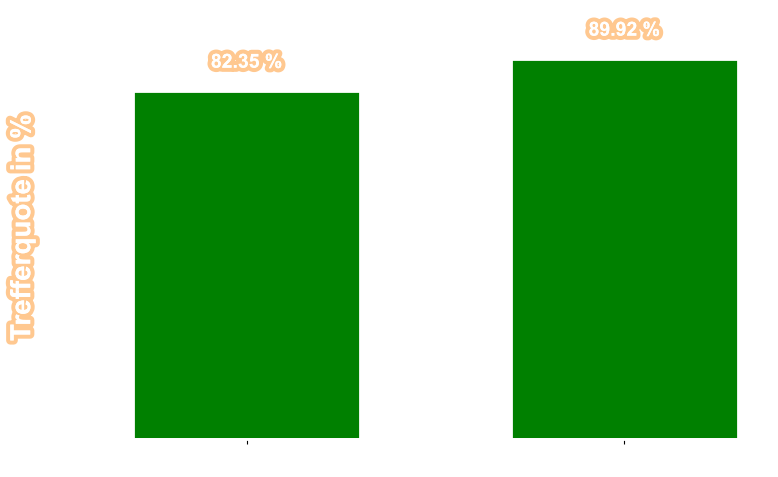

In [ ]:
labels = ["Logistische Regression", "Random Forest"]
werte = [82.35, 89.92]
farben = ['green', 'green']

x = np.arange(len(labels))
breite = 0.6

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 14

def glowing(): return [path_effects.withStroke(linewidth=6, foreground='#FFA447', alpha=0.6), path_effects.Normal()]

fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(x, werte, color=farben, edgecolor='white', linewidth=2, width=breite)

for bar in bars:
    y = bar.get_height()
    t = ax.text(bar.get_x() + bar.get_width()/2, y + 0.05 * max(werte),
                f"{y:.2f} %", ha='center', va='bottom',
                fontsize=14, fontweight='bold', color='white')
    t.set_path_effects(glowing())

ax.set_xticks(x)
ax.set_xticklabels(labels, color='white', fontweight='bold')

ax.set_ylim(0, 100)
ax.tick_params(axis='y', colors='white')

ylabel = ax.set_ylabel("Trefferquote in %", fontsize=20, fontweight='bold', color='white', labelpad=18)
ylabel.set_path_effects(glowing())

for side in ['top', 'right']:
    ax.spines[side].set_visible(False)
for side in ['left', 'bottom']:
    ax.spines[side].set_color('white')
    ax.spines[side].set_linewidth(2)

ax.set_facecolor('none')
fig.patch.set_alpha(0.0)

plt.tight_layout()
plt.show()

### Confusion Matrix Logistische Regression vs. Random Forest

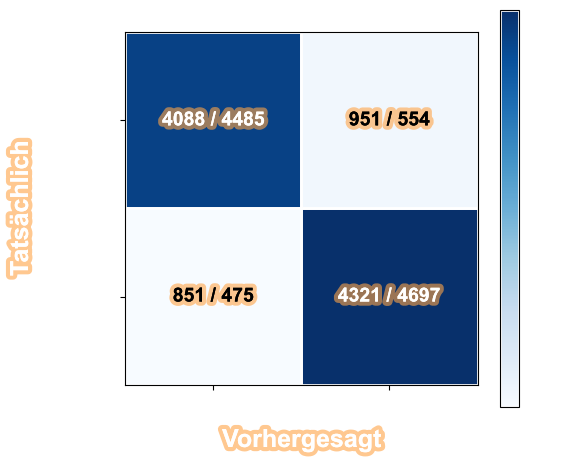

In [ ]:
cm_log = np.array([[4088, 951],
                   [851, 4321]])

cm_rf = np.array([[4485, 554],
                  [475, 4697]])

labels = ["Team 1", "Team 2"]

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 14

def glowing(): return [path_effects.withStroke(linewidth=6, foreground='#FFA447', alpha=0.6), path_effects.Normal()]

fig, ax = plt.subplots(figsize=(6, 5))
im = ax.imshow(cm_log, cmap="Blues")

ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels, color="white", fontweight="bold")
ax.set_yticklabels(labels, color="white", fontweight="bold")

xlabel = ax.set_xlabel("Vorhergesagt", labelpad=12, color="white", fontsize=18, fontweight="bold")
ylabel = ax.set_ylabel("Tatsächlich", labelpad=12, color="white", fontsize=18, fontweight="bold")
xlabel.set_path_effects(glowing())
ylabel.set_path_effects(glowing())

for i in range(2):
    for j in range(2):
        log_wert = cm_log[i, j]
        rf_wert = cm_rf[i, j]
        text = f"{log_wert} / {rf_wert}"
        farbe = "black" if (i == 0 and j == 1) or (i == 1 and j == 0) else "white"

        ax.add_patch(plt.Rectangle((j - 0.5, i - 0.5), 1, 1, fill=False, edgecolor='white', linewidth=2))

        t = ax.text(j, i, text, ha="center", va="center", fontsize=14, fontweight="bold", color=farbe)
        t.set_path_effects(glowing())

cbar = fig.colorbar(im, ax=ax)
cbar.ax.yaxis.set_tick_params(color='white')
plt.setp(cbar.ax.get_yticklabels(), color='white')

cbar_outline = plt.Rectangle((0, 0), 1, 1, transform=cbar.ax.transAxes,
                             fill=False, edgecolor='white', linewidth=2)
cbar.ax.add_patch(cbar_outline)

fig.patch.set_alpha(0.0)
ax.set_facecolor('none')

plt.tight_layout()
plt.show()

### Vorhersagevergleich Richtig vs. Falsch

In [442]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

acc_log = accuracy_score(y_test, y_pred_log) * 100
error_log = 100 - acc_log

In [443]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

acc_rf = accuracy_score(y_test, y_pred_rf) * 100
error_rf = 100 - acc_rf

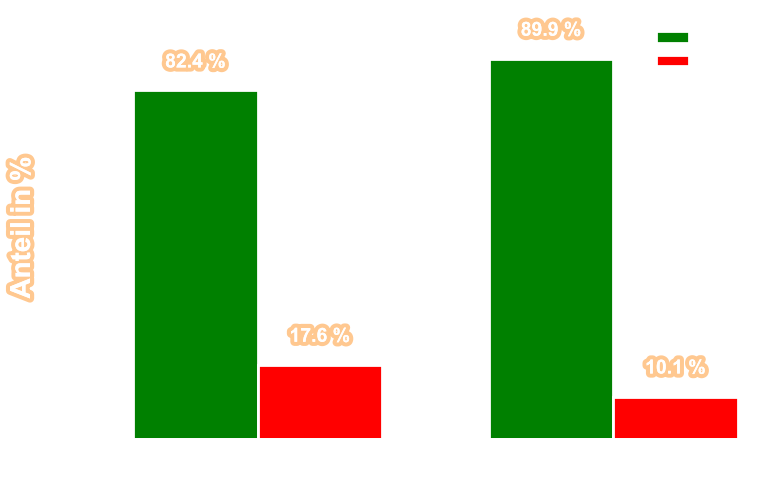

In [ ]:
modelle = ["Log. Regression", "Random Forest"]
richtig = [82.4, 89.9]
falsch = [17.6, 10.1]

x = np.arange(len(modelle))
breite = 0.35

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 14

def glowing(): return [path_effects.withStroke(linewidth=6, foreground='#FFA447', alpha=0.6), path_effects.Normal()]

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x, richtig, width=breite, color='green', label='Richtig', edgecolor='white', linewidth=2)
bars2 = ax.bar(x + breite, falsch, width=breite, color='red', label='Falsch', edgecolor='white', linewidth=2)

for bar in bars1 + bars2:
    y = bar.get_height()
    t = ax.text(bar.get_x() + bar.get_width()/2, y + 0.05 * max(richtig + falsch),
                f"{y:.1f} %", ha='center', va='bottom', fontsize=14, fontweight='bold', color='white')
    t.set_path_effects(glowing())

ax.set_xticks(x + breite / 2)
ax.set_xticklabels(modelle, color='white', fontweight='bold')

ax.set_ylim(0, 100)
ylabel = ax.set_ylabel("Anteil in %", color='white', fontsize=20, fontweight='bold', labelpad=18)
ylabel.set_path_effects(glowing())

ax.tick_params(colors='white')

leg = ax.legend(frameon=False, loc='upper right', fontsize=12)
for t in leg.get_texts():
    t.set_color('white')

for side in ['top', 'right']:
    ax.spines[side].set_visible(False)
for side in ['left', 'bottom']:
    ax.spines[side].set_color('white')
    ax.spines[side].set_linewidth(2)

ax.set_facecolor('none')
fig.patch.set_alpha(0.0)

plt.tight_layout()
plt.show()

### Fehlerverteilung pro Team und Modell

In [450]:
# Werte eintragen (Fehlklassifikationen + Prozent)
# Logistische Regression
lr_team2_fehler = 951
lr_team2_prozent = 52.8

lr_team1_fehler = 851
lr_team1_prozent = 47.2

rf_team2_fehler = 670
rf_team2_prozent = 44.1

rf_team1_fehler = 850
rf_team1_prozent = 55.9

werte = [lr_team2_fehler, lr_team1_fehler, rf_team2_fehler, rf_team1_fehler]
prozent = [lr_team2_prozent, lr_team1_prozent, rf_team2_prozent, rf_team1_prozent]
farben = ["red", "blue", "red", "blue"]

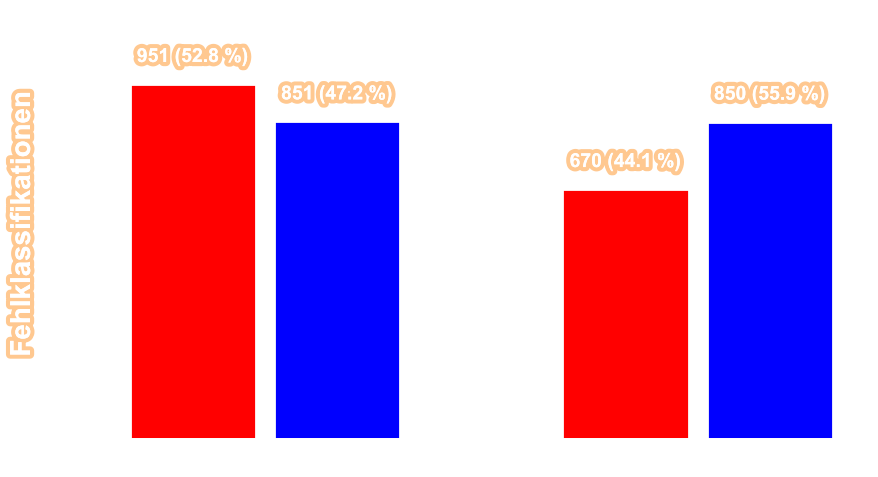

In [ ]:
x_pos = [0.0, 0.4, 1.2, 1.6]

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 14

def glowing(): return [path_effects.withStroke(linewidth=6, foreground='#FFA447', alpha=0.6), path_effects.Normal()]

fig, ax = plt.subplots(figsize=(9, 5))
bars = ax.bar(x_pos, werte, width=0.35, color=farben, edgecolor='white', linewidth=2)

for i, bar in enumerate(bars):
    y = bar.get_height()
    t = ax.text(bar.get_x() + bar.get_width()/2, y + 0.05 * max(werte),
                f"{werte[i]} ({prozent[i]:.1f} %)",
                ha='center', va='bottom', fontsize=14, fontweight='bold', color='white')
    t.set_path_effects(glowing())

plt.xticks([0.2, 1.4], ["Log. Regression", "Random Forest"], color='white')

ylabel = ax.set_ylabel("Fehlklassifikationen", fontsize=20, color='white', fontweight='bold')
ylabel.set_path_effects(glowing())

ax.set_ylim(0, max(werte) + 200)
ax.set_facecolor('none')
fig.patch.set_alpha(0.0)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('white'); ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_color('white'); ax.spines['bottom'].set_linewidth(2)
ax.tick_params(colors='white')

plt.tight_layout()
plt.show()

### Feature Wichtigkeit Lineare Regression vs. Random Forest

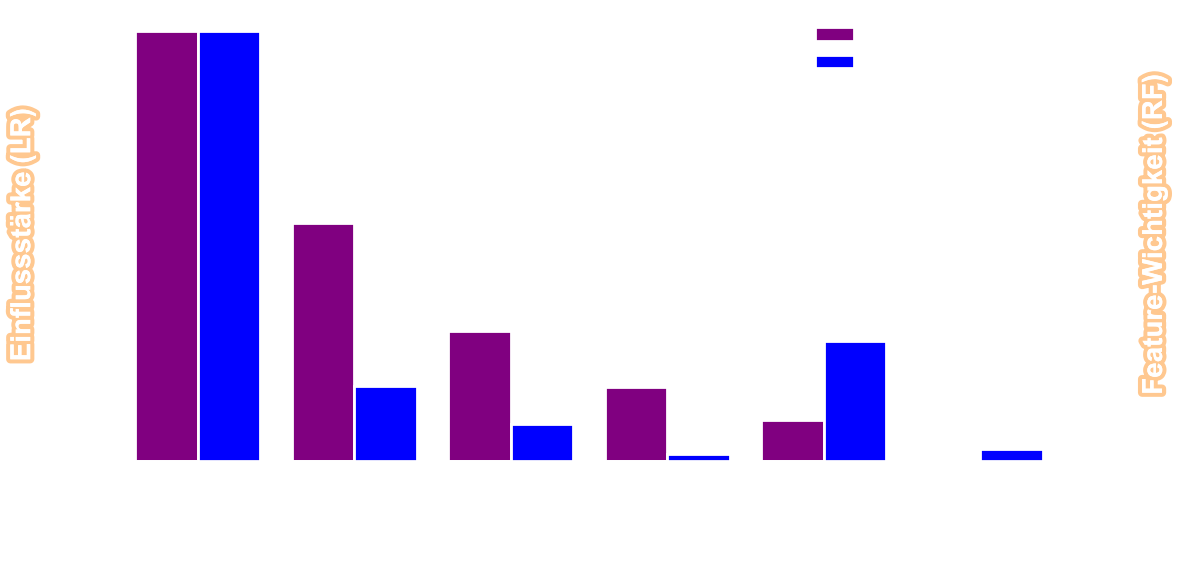

In [447]:
wichtigkeiten_lr = pd.Series(abs(model.coef_[0]), index=features).sort_values(ascending=False)
wichtigkeiten_rf = pd.Series(rf_model.feature_importances_, index=features)[wichtigkeiten_lr.index]


def glowing(): return [path_effects.withStroke(linewidth=6, foreground='#FFA447', alpha=0.6), path_effects.Normal()]
plt.rcParams['font.family'] = 'Arial'; plt.rcParams['font.size'] = 14

x = np.arange(len(wichtigkeiten_lr))
b = 0.4
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

bars = [
    (ax1, x - b/2, wichtigkeiten_lr.values, 'purple', 'Logistische Regression'),
    (ax2, x + b/2, wichtigkeiten_rf.values, 'blue', 'Random Forest')
]

for ax, pos, werte, farbe, label in bars:
    ax.bar(pos, werte, width=b, color=farbe, edgecolor='white', linewidth=2, label=label)
    ax.set_facecolor('none')
    ax.tick_params(colors='white')
    ax.yaxis.label.set_path_effects(glowing())

ax1.set_ylabel('Einflussstärke (LR)', fontsize=20, color='white', fontweight='bold', labelpad=12)
ax2.set_ylabel('Feature-Wichtigkeit (RF)', fontsize=20, color='white', fontweight='bold', labelpad=12)

ax1.set_xticks(x)
ax1.set_xticklabels(wichtigkeiten_lr.index, rotation=45, ha='right', color='white')

for a in [ax1, ax2]:
    a.spines['left'].set_color('white'); a.spines['left'].set_linewidth(2)
    a.spines['bottom'].set_color('white'); a.spines['bottom'].set_linewidth(2)
    a.spines['right'].set_color('white'); a.spines['right'].set_linewidth(2)
    a.spines['top'].set_visible(False)

ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
leg = ax1.legend(h1 + h2, l1 + l2, loc='upper right', frameon=False)
for txt in leg.get_texts(): txt.set_color('white')

fig.patch.set_alpha(0.0)
plt.tight_layout()
plt.show()

### Modellvergleich Genauigkeit Logistische Regression vs. Random Forest

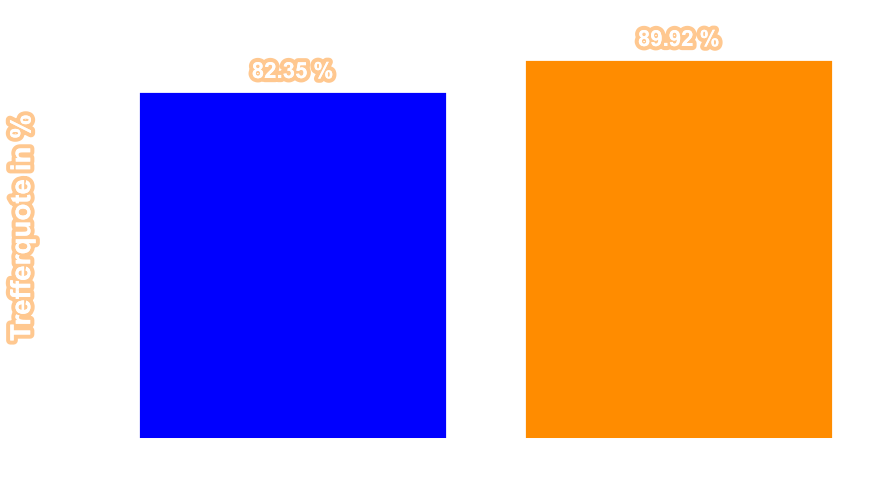

In [448]:
acc_log = 82.35
acc_rf = 89.92
werte = [acc_log, acc_rf]
labels = ["Logistische Regression", "Random Forest"]
farben = ["blue", "darkorange"]

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 14

def glowing_text_effect():
    return [path_effects.withStroke(linewidth=6, foreground='#FFA447', alpha=0.6),
            path_effects.Normal()]

fig, ax = plt.subplots(figsize=(9, 5))
bars = ax.bar(labels, werte, color=farben, edgecolor='white', linewidth=2)

for bar in bars:
    hoehe = bar.get_height()
    text = ax.text(bar.get_x() + bar.get_width()/2, hoehe + 3,
                   f"{hoehe:.2f} %",
                   ha='center', color='white', fontweight='bold', fontsize=16)
    text.set_path_effects(glowing_text_effect())

ylabel = ax.set_ylabel("Trefferquote in %", fontsize=20, color='white', fontweight='bold', labelpad=18)
ylabel.set_path_effects(glowing_text_effect())

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('white')
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_color('white')
ax.spines['bottom'].set_linewidth(2)

ax.tick_params(colors='white')

ax.set_ylim(0, 100)
ax.set_facecolor('none')
fig.patch.set_alpha(0.0)

plt.tight_layout()
plt.show()

### Modellvergleich Baseline vs. Logistische Regression vs. Random Forest

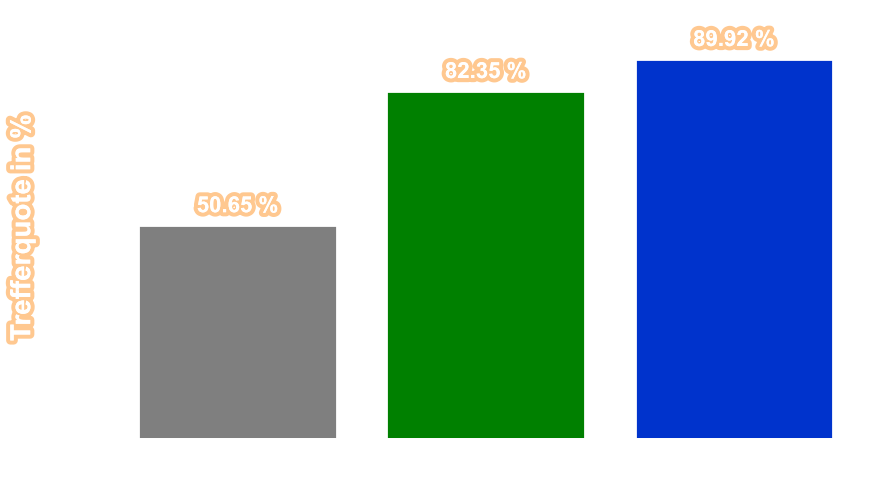

In [449]:
modelle = ['Baseline', 'Logistische Regression', 'Random Forest']
trefferquoten = [50.65, 82.35, 89.92]
farben = ['#7f7f7f', 'green', '#0033cc']

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 14

fig, ax = plt.subplots(figsize=(9, 5))

bars = ax.bar(modelle, trefferquoten, color=farben, edgecolor='white', linewidth=2)

def glowing_text_effect():
    return [path_effects.withStroke(linewidth=6, foreground='#FFA447', alpha=0.6), path_effects.Normal()]

for bar in bars:
    yval = bar.get_height()
    text = ax.text(bar.get_x() + bar.get_width() / 2, yval + 3,
                   f'{yval:.2f} %',
                   ha='center', color='white', fontweight='bold', fontsize=16)
    text.set_path_effects(glowing_text_effect())

ylabel = ax.set_ylabel('Trefferquote in %', fontsize=20, color='white', fontweight='bold', labelpad=18)
ylabel.set_path_effects(glowing_text_effect())

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('white')
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_color('white')
ax.spines['bottom'].set_linewidth(2)

ax.tick_params(colors='white')

ax.set_ylim(0, 100)
ax.set_facecolor('none')
fig.patch.set_alpha(0.0)

plt.tight_layout()
plt.show()
